In [ ]:
!pip install pymunk==5.5.0

In [ ]:
!pip install keras tensorflow  numpy

In [ ]:
!pip install gym --upgrade


In [ ]:
 !pip install stable_baselines

In [ ]:
!pip install stable-baselines3


## Import Packages

In [ ]:
import gym
import robo_soccer, random
import numpy as np
from stable_baselines.common.policies import FeedForwardPolicy
from stable_baselines.common.callbacks import EvalCallback
import os
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from stable_baselines.common.vec_env import VecEnv
from stable_baselines.a2c.a2c import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
# from stable_baselines.common.evaluation import evaluate_policy
import pymunk
from pymunk.vec2d import Vec2d

import pymunk.matplotlib_util

# Colab Rendering

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import pymunk
import pymunk.matplotlib_util
from IPython import display


def colab_render(env):
    ob = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = np.reshape(env.random_action(), -1)
        ob, reward, done, info = env.step(action)
        total_reward += reward
        plt.clf()
        reward_str = "{:.2f}".format(reward)
        title_str = "Reward: " + reward_str + "      Team A: " + str(info['score_team_a']) + " | Team B: " + str(info['score_team_b'])
        padding = 5
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xlim([0 - padding, env.width + padding])
        ax.set_ylim([0 - padding, env.height + padding])
        ax.set_aspect("equal")
        ax.set_facecolor('green')
        o = pymunk.matplotlib_util.DrawOptions(ax)
        env.space.debug_draw(o)
        plt.title(title_str, loc='left',fontsize=16,fontweight='bold')
        ax.tick_params(axis='both', which='both', length=0, labelcolor='white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        display.display(fig)
        display.clear_output(wait=True)
        
    return total_reward

# Gym Environment for Testing

 

In [6]:
# gym environment for 11 by 11 players

env = gym.make("Robosoccer11v11-v1")
 

34.0
34.0


## Reward Getting
Both side take random actions 

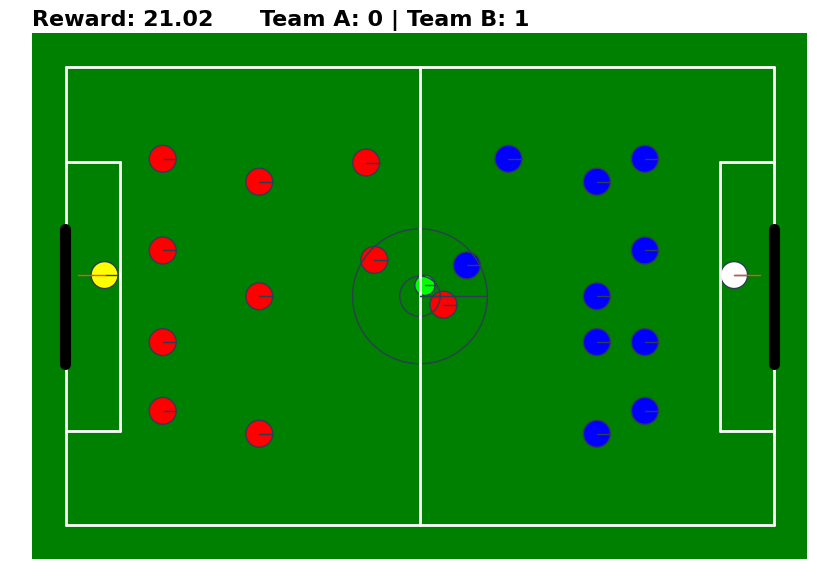

In [7]:
# Both side take random actions 

total_reward = colab_render(env)

#Training the Model

In [9]:
from stable_baselines3.common.sb2_compat.rmsprop_tf_like import RMSpropTFLike


In [10]:
# Policy Optimizer Class 

policy_kwargs = {}
policy_kwargs["optimizer_class"] = RMSpropTFLike
policy_kwargs["optimizer_kwargs"] = dict(
        alpha=0.99, eps=1e-5, weight_decay=0)
policy_kwargs["net_arch"] = [dict(pi=[64, 64], vf=[64])]

In [11]:
from custom_model import A2C


In [ ]:
# A2C MOdel with MlPolicy

model = A2C(
        "MlpPolicy",
        env,
        policy_kwargs=policy_kwargs,
        verbose=2)

In [10]:
# total time stamps we can change it to our own choice

total_timesteps = 80000


In [13]:
# training the Model

model.learn(total_timesteps=total_timesteps)


-------------------------------------
| time/                 |           |
|    fps                | 103       |
|    iterations         | 100       |
|    time_elapsed       | 4         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -32.5     |
|    explained_variance | -0.000159 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6099      |
|    policy_loss        | -68.8     |
|    value_loss         | 697       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 108       |
|    iterations         | 200       |
|    time_elapsed       | 9         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -33.1     |
|    explained_variance | -0.000887 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6199      |
|    policy_loss        | 1.04e+03  |
|    value_l

In [14]:
model.save("model_11v11")

In [11]:
# function for get score

def get_score(env, model):
    ob = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _states = model.predict(ob)
        # print(action)
        ob, reward, done, info = env.step(action)

        total_reward += reward
    return total_reward

In [ ]:
!pip install tqdm

In [13]:
# import tqdm for progress bar

from tqdm import tqdm

In [14]:
# Calculating rewards on 30 iteratons


iterations = 30
rewards = []
for _ in tqdm(range(iterations)):
    total_reward = get_score(env, model)
    rewards.append(total_reward)
print(
    f"Avg Total Reward:                  {sum(rewards) / len(rewards)}\n")

print(f"Saving Model to ")
model.save("model_11v11")
print("Model Saved.")


# Using Pre-trained Model
 



In [14]:
def colab_render1(env,model):
    ob = env.reset()
    done = False
    total_reward = 0
    while not done:
        # action = np.reshape(env.random_action(), -1)
        action, _states = model.predict(ob)
        ob, reward, done, info = env.step(action)
        total_reward += reward
        plt.clf()
        reward_str = "{:.2f}".format(reward)
        title_str = (
            f"Reward: {reward_str}      Team A: "
            + str(info['score_team_a'])
            + " | Team B: "
            + str(info['score_team_b'])
        )
        padding = 5
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xlim([0 - padding, env.width + padding])
        ax.set_ylim([0 - padding, env.height + padding])
        ax.set_aspect("equal")
        ax.set_facecolor('green')
        o = pymunk.matplotlib_util.DrawOptions(ax)
        env.space.debug_draw(o)
        plt.title(title_str, loc='left',fontsize=16,fontweight='bold')
        ax.tick_params(axis='both', which='both', length=0, labelcolor='white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        display.display(fig)
        display.clear_output(wait=True)
    return total_reward

In [13]:
# Testing the pre-trained Model

model = A2C.load("model_11v11.zip")

 
print("\nRendering Game")
total_reward = colab_render1(env, model)
print(f"Total Reward for Rendered Game:     {total_reward}")

In [ ]:
#loading the models it loads the complete architecutre of the model
model = A2C.load("model_11v11.zip")

In [ ]:
 #setting environment for continue training

model.set_env(env)

In [ ]:
# Train the model

model.learn(total_timesteps=7000)

In [ ]:
model.save("new_model_saved")